In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('titanic3.xls') 


In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Unuseful Features :  Name and Ticket >> To be dropped 
# Categorical Features: Sex, Pclass, SibSp, Parch and Embarked
# Numerical Features : Age and Fare
# Target : Survived

In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.shape

(1309, 14)

# cleannig

In [6]:

df.drop('name',axis=1, inplace=True)



In [7]:
df.drop('ticket',axis=1, inplace=True)


In [8]:
df.drop('boat',axis=1, inplace=True)


In [9]:
df.drop('body',axis=1, inplace=True)


In [10]:
df.drop('home.dest',axis=1, inplace=True)


In [11]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S


In [12]:
# Check duplicates
df.duplicated().sum()

185

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# Check Missing Values
df.isnull().sum()

pclass        0
survived      0
sex           0
age         145
sibsp         0
parch         0
fare          1
cabin       830
embarked      2
dtype: int64

<Axes: >

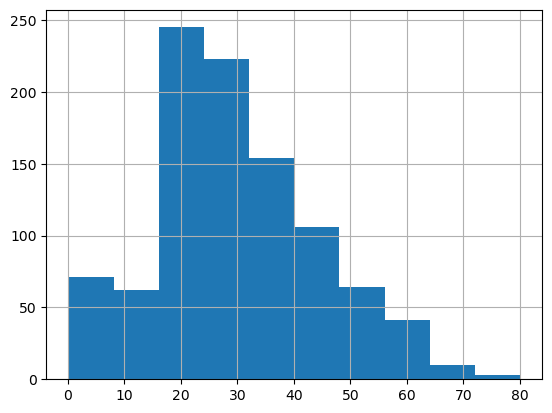

In [15]:
df.age.hist()

In [16]:
# convert age to numeric 
df['age'] = pd.to_numeric(df['age'],errors='coerce')
df['embarked'] = pd.to_numeric(df['embarked'],errors='coerce')

In [17]:
# filling missing values of age
df['age'] = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))



C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\4102176852.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['age'] = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))


In [18]:
df.dropna(subset=['cabin'], inplace=True)


In [19]:
df['embarked'].dtype

dtype('float64')

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

df['embarked'] = imputer.fit(df[['embarked']])

In [21]:
df['fare'].fillna(df.fare.median(),inplace=True)

In [22]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

# univariate analysis

In [25]:
def explore_categorical(df,col):
    print(f'##{col}##')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col,data=df)
    plt.show()
    
    

##pclass##
1    0.867347
2    0.078231
3    0.054422
Name: pclass, dtype: float64


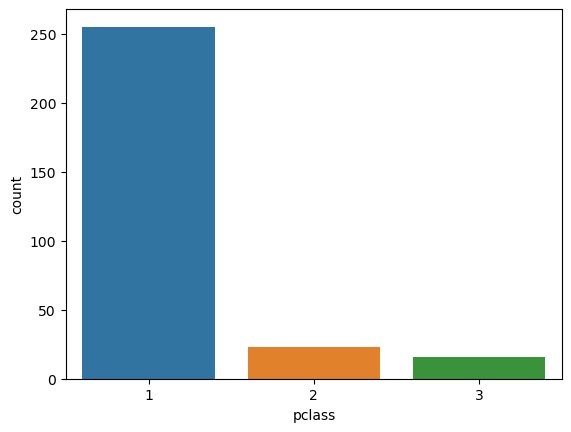

##sibsp##
0    0.578231
1    0.374150
2    0.034014
3    0.013605
Name: sibsp, dtype: float64


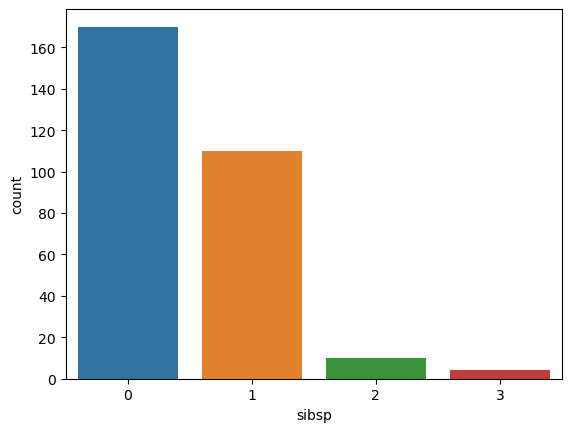

##parch##
0    0.693878
1    0.190476
2    0.098639
3    0.010204
4    0.006803
Name: parch, dtype: float64


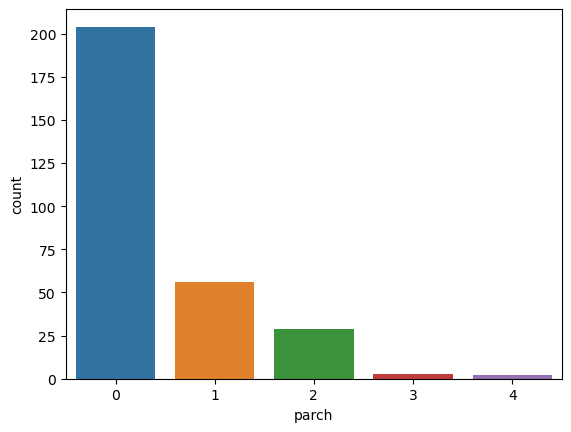

##embarked##
KNNImputer(n_neighbors=2)    1.0
Name: embarked, dtype: float64


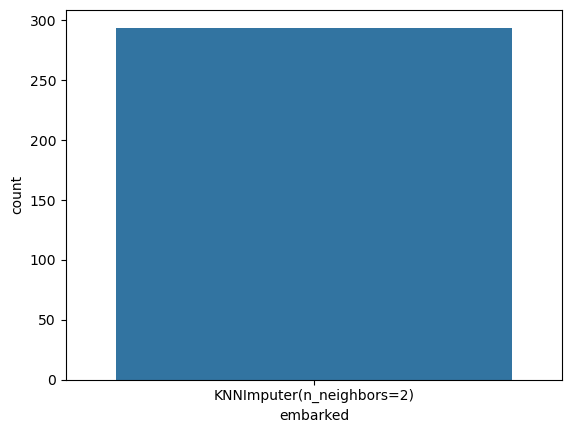

##sex##
male      0.52381
female    0.47619
Name: sex, dtype: float64


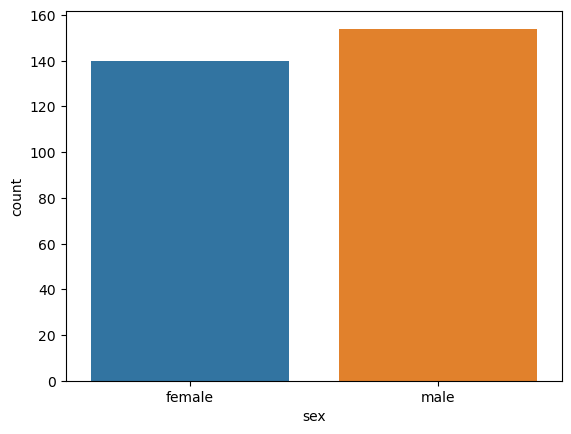

In [26]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    explore_categorical(df,col)

In [27]:
def explore_continus(df,col):
    print(f'##{col}##')
    print(df[col].describe())
    sns.histplot(x=col,data=df)
    plt.show()
    

##age##
count    294.000000
mean      36.986111
std       15.084455
min        0.916700
25%       26.000000
50%       36.000000
75%       48.000000
max       80.000000
Name: age, dtype: float64


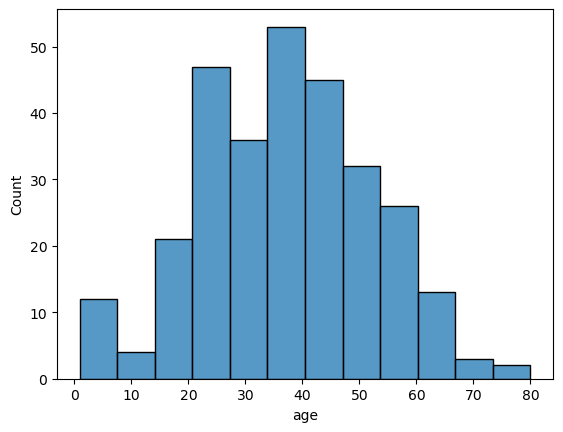

##fare##
count    294.000000
mean      81.971954
std       79.150205
min        0.000000
25%       29.700000
50%       56.964600
75%       92.894800
max      512.329200
Name: fare, dtype: float64


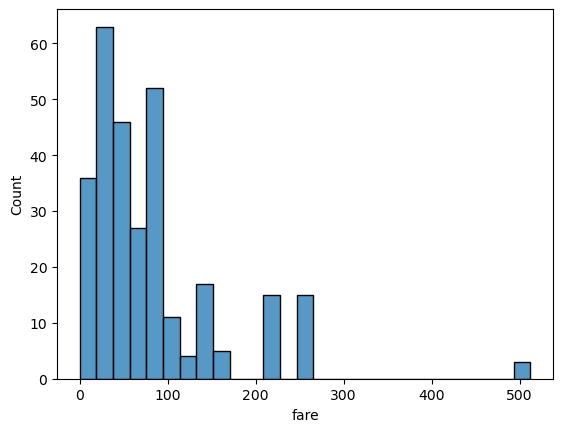

In [29]:
for col in ['age', 'fare']:
    explore_continus(df,col)


# bivariate analysis

In [32]:
def survival_rate(df,col):
    df.groupby(col).survived.mean()
    sns.barplot(x=col,y='survived',data=df,ci=None)
    plt.axhline(df.survived.mean(),color='black',linestyle='--')
    plt.show()
    
    

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


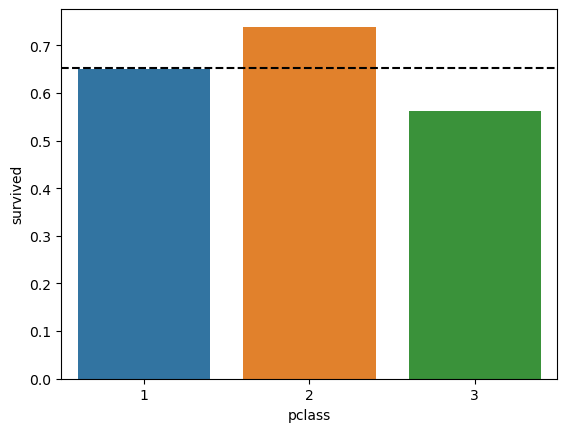

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


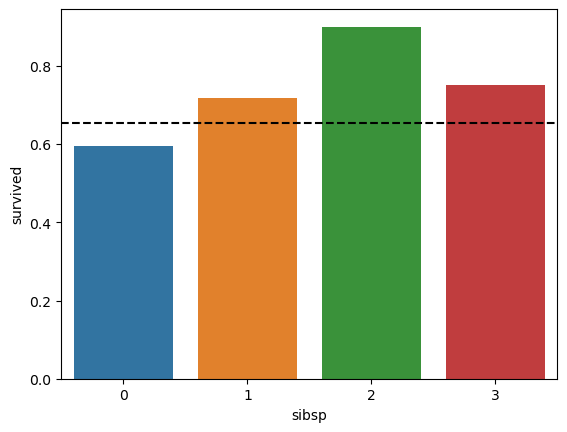

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


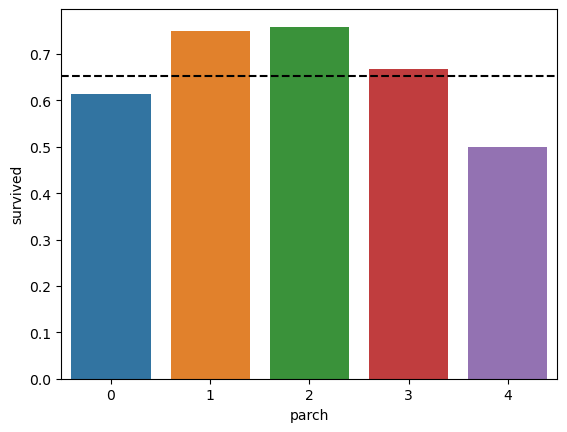

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


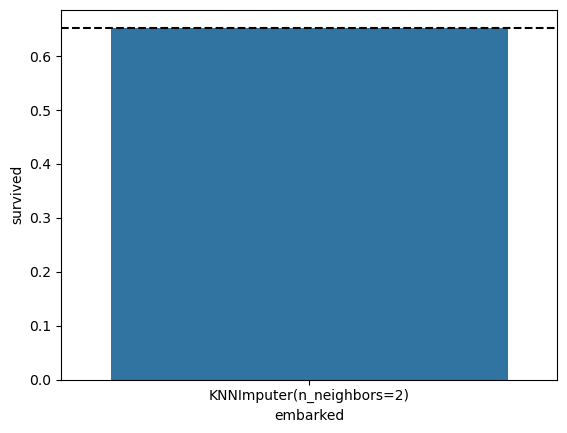

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


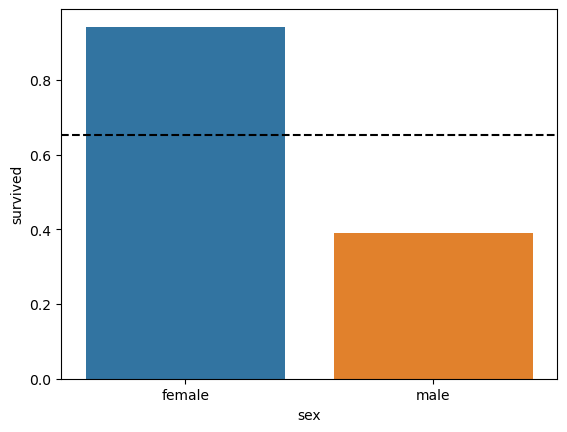

In [33]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    survival_rate(df, col)

In [35]:
df_survived=df[df.survived==1]
df_died=df[df.survived==0]

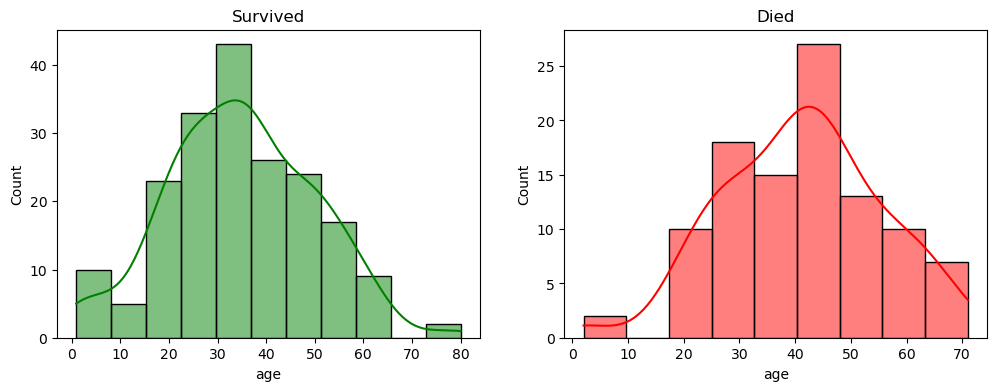

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age',data=df_survived,ax=ax[0],kde=True,color='green')
sns.histplot(x='age',data=df_died,ax=ax[1],kde=True,color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()



<Axes: xlabel='age'>

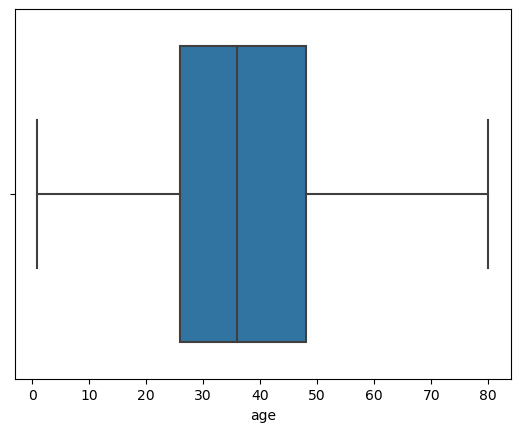

In [40]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='fare'>

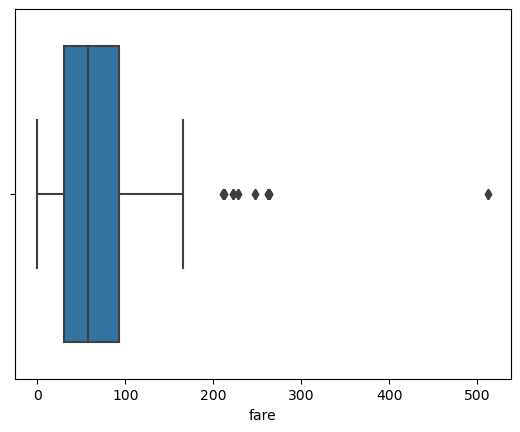

In [41]:
sns.boxplot(x='fare',data=df)

In [42]:
# remove outliers
df['fare']=df['fare']<300

In [43]:
# Split Age into groups
df['age_group'] = pd.cut(df.age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


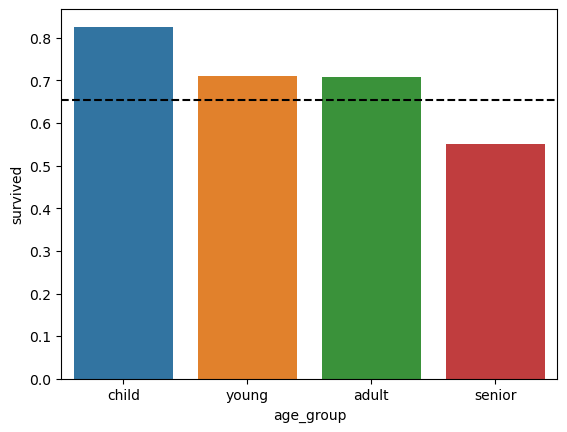

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


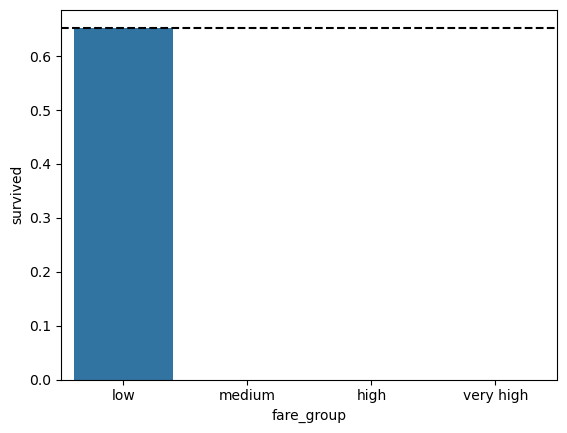

In [44]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

In [45]:
df['family_size']=df['sibsp']+df['parch']

In [48]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,age_group,fare_group,family_size
0,1,1,female,29.0000,0,0,True,B5,KNNImputer(n_neighbors=2),adult,low,0
1,1,1,male,0.9167,1,2,True,C22 C26,KNNImputer(n_neighbors=2),child,low,3
2,1,0,female,2.0000,1,2,True,C22 C26,KNNImputer(n_neighbors=2),child,low,3
3,1,0,male,30.0000,1,2,True,C22 C26,KNNImputer(n_neighbors=2),adult,low,3
4,1,0,female,25.0000,1,2,True,C22 C26,KNNImputer(n_neighbors=2),young,low,3


C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2203534192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='survived',data=df,ci=None)


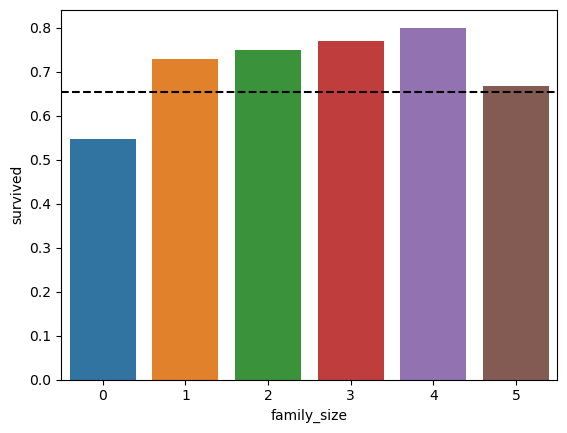

In [66]:
survival_rate(df,'family_size')

In [61]:
df['family_size'].sort_values()

0      0
189    0
190    0
192    0
194    0
      ..
112    5
111    5
115    5
114    5
116    5
Name: family_size, Length: 294, dtype: int64

In [74]:
df['x']=df.groupby('family_size').survived.mean().sort_values()

x

family_size
0    0.546154
5    0.666667
1    0.729167
2    0.750000
3    0.769231
4    0.800000
Name: survived, dtype: float64

In [75]:
df.nlargest(3,'x')

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,age_group,fare_group,family_size,alone_passenger,x
4,1,0,female,25.0,1,2,True,C22 C26,KNNImputer(n_neighbors=2),young,low,3,False,0.800000
3,1,0,male,30.0,1,2,True,C22 C26,KNNImputer(n_neighbors=2),adult,low,3,False,0.769231
2,1,0,female,2.0,1,2,True,C22 C26,KNNImputer(n_neighbors=2),child,low,3,False,0.750000


In [59]:
#How many passengers were alone
df['alone_passenger']=df['family_size']==0
sum(df['family_size']==0)

130

##alone_passenger##
False    0.557823
True     0.442177
Name: alone_passenger, dtype: float64


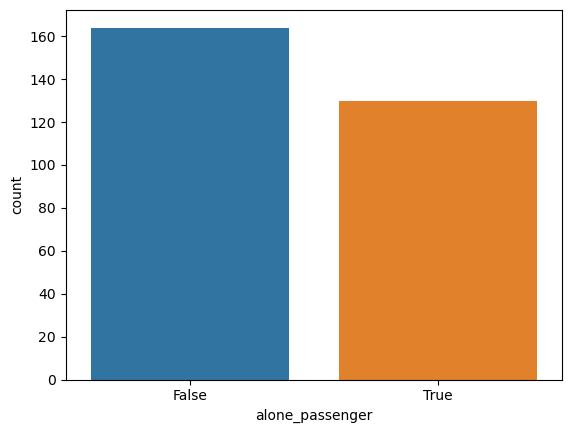

In [60]:
    explore_categorical(df,'alone_passenger')

# Multivariate Analysis

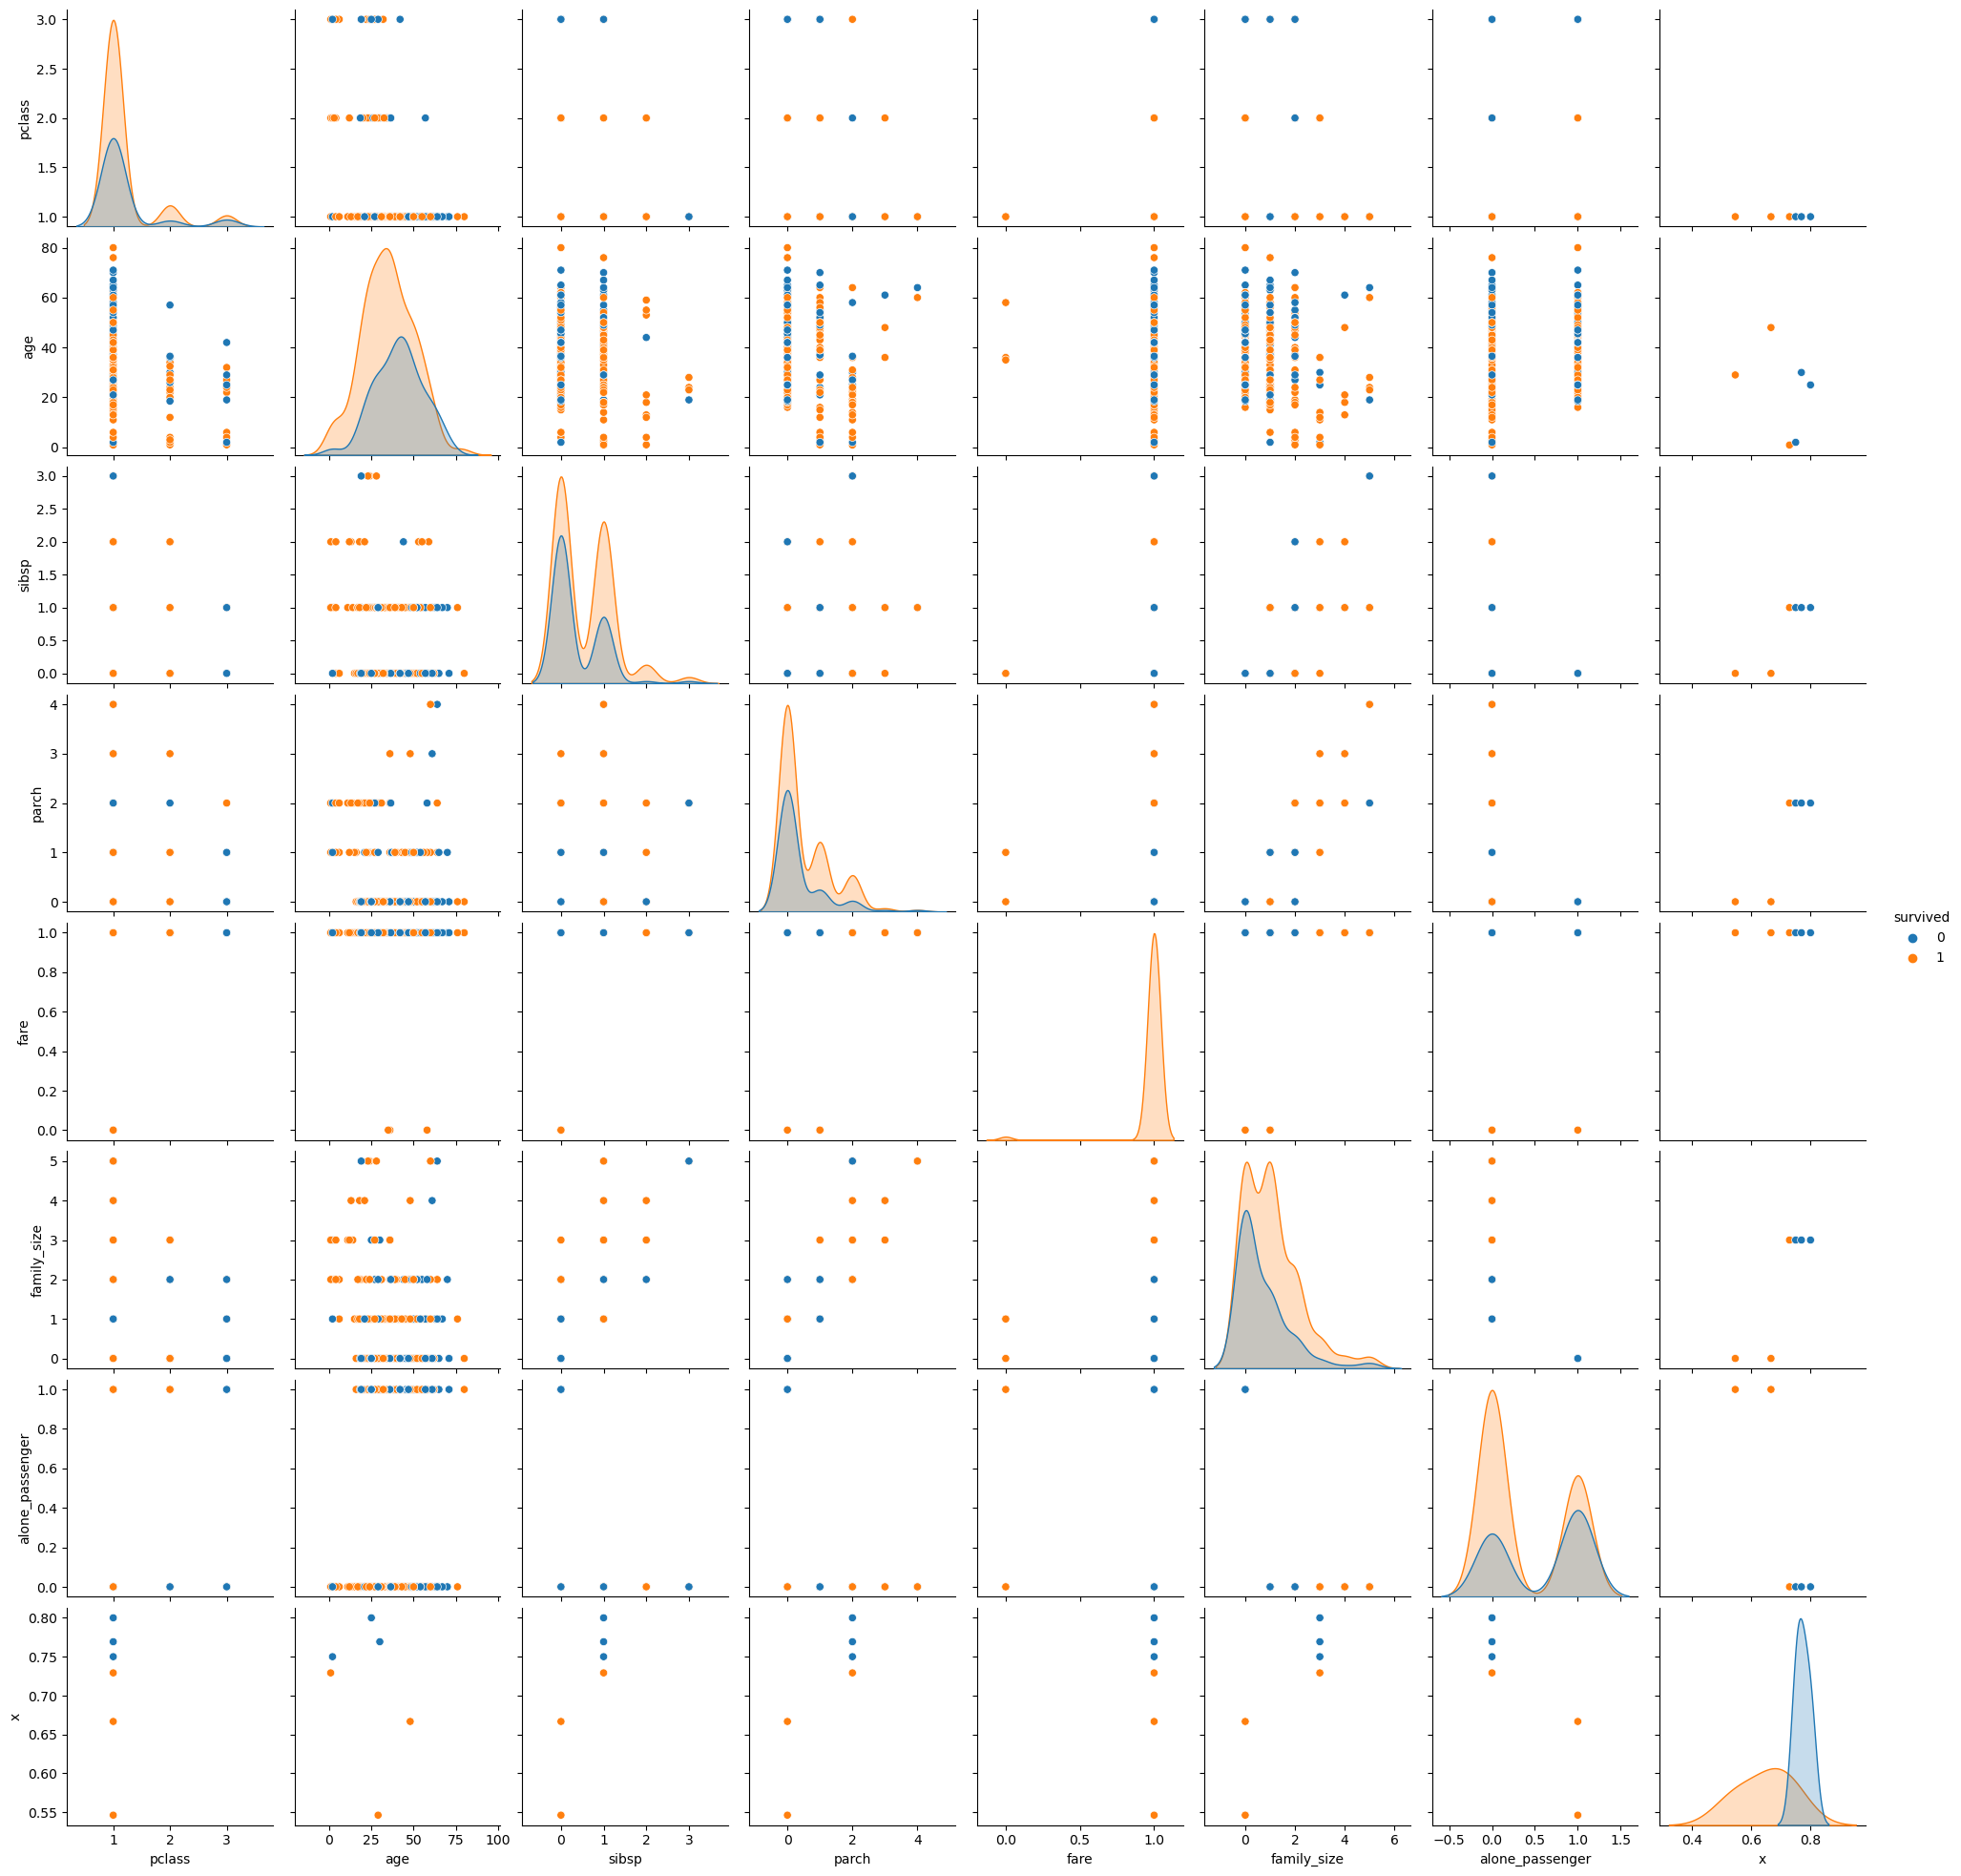

In [76]:
sns.pairplot(df, hue='survived');


In [77]:
df.corr()


C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pclass,survived,age,sibsp,parch,fare,family_size,alone_passenger,x
pclass,1.000000,-0.012847,-0.352750,-0.111318,0.030356,0.037186,-0.042231,0.102974,NaN
survived,-0.012847,1.000000,-0.200210,0.149996,0.097441,-0.074005,0.151981,-0.199965,-0.748829
age,-0.352750,-0.200210,1.000000,-0.088322,-0.165172,-0.040549,-0.163574,0.110200,-0.328199
sibsp,-0.111318,0.149996,-0.088322,1.000000,0.264999,0.077601,0.748904,-0.680460,0.874106
parch,0.030356,0.097441,-0.165172,0.264999,1.000000,-0.029295,0.837445,-0.517714,0.874106
fare,0.037186,-0.074005,-0.040549,0.077601,-0.029295,1.000000,0.023850,0.022252,NaN
family_size,-0.042231,0.151981,-0.163574,0.748904,0.837445,0.023850,1.000000,-0.741472,0.874106
alone_passenger,0.102974,-0.199965,0.110200,-0.680460,-0.517714,0.022252,-0.741472,1.000000,-0.874106
x,NaN,-0.748829,-0.328199,0.874106,0.874106,NaN,0.874106,-0.874106,1.000000


In [78]:
df.corr()['survived']


C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2462357119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['survived']


pclass            -0.012847
survived           1.000000
age               -0.200210
sibsp              0.149996
parch              0.097441
fare              -0.074005
family_size        0.151981
alone_passenger   -0.199965
x                 -0.748829
Name: survived, dtype: float64

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1585346293.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


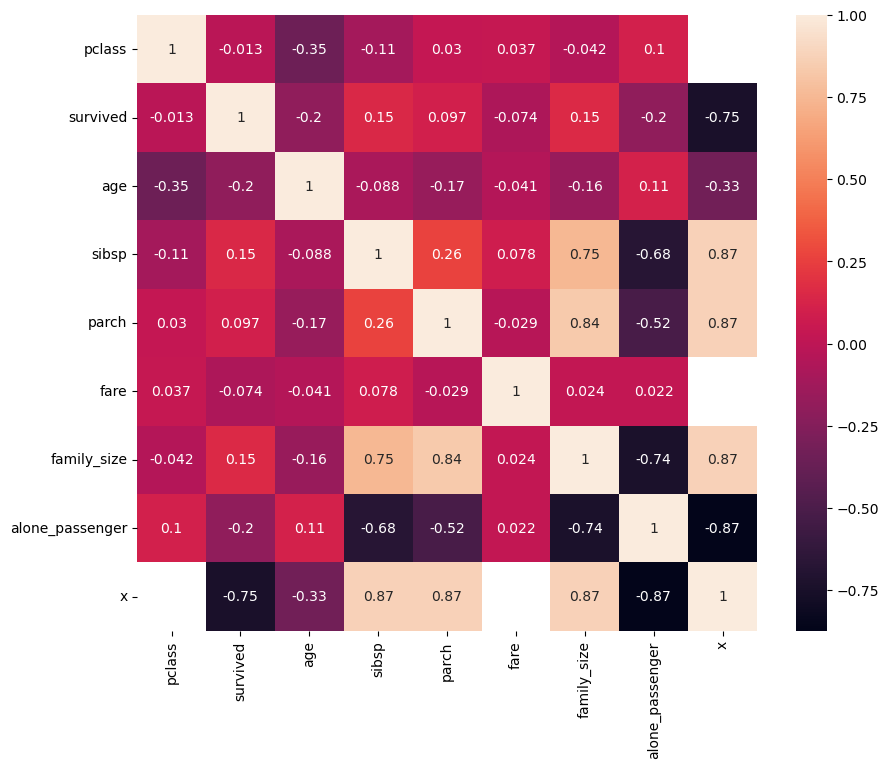

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\3144562878.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


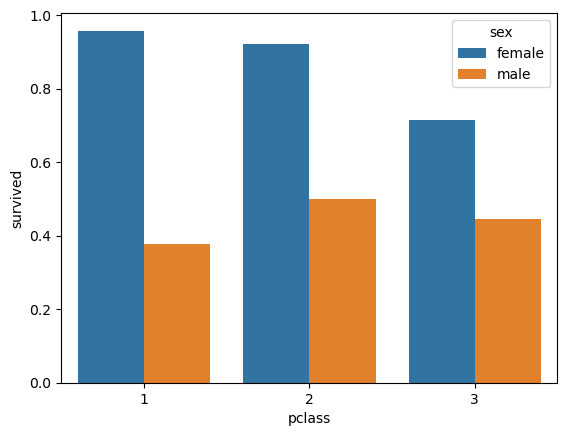

In [80]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1003336910.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


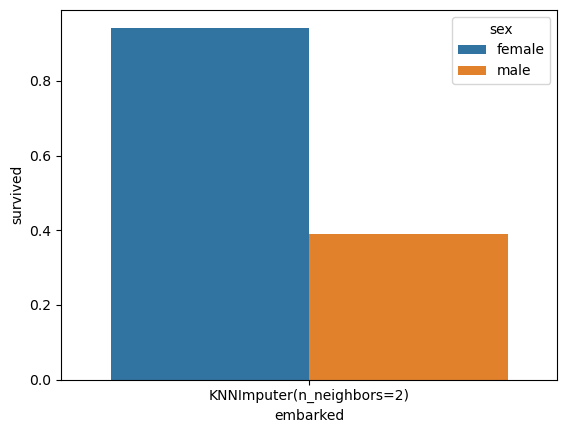

In [81]:

sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\1311005070.py:4: FutureWarn

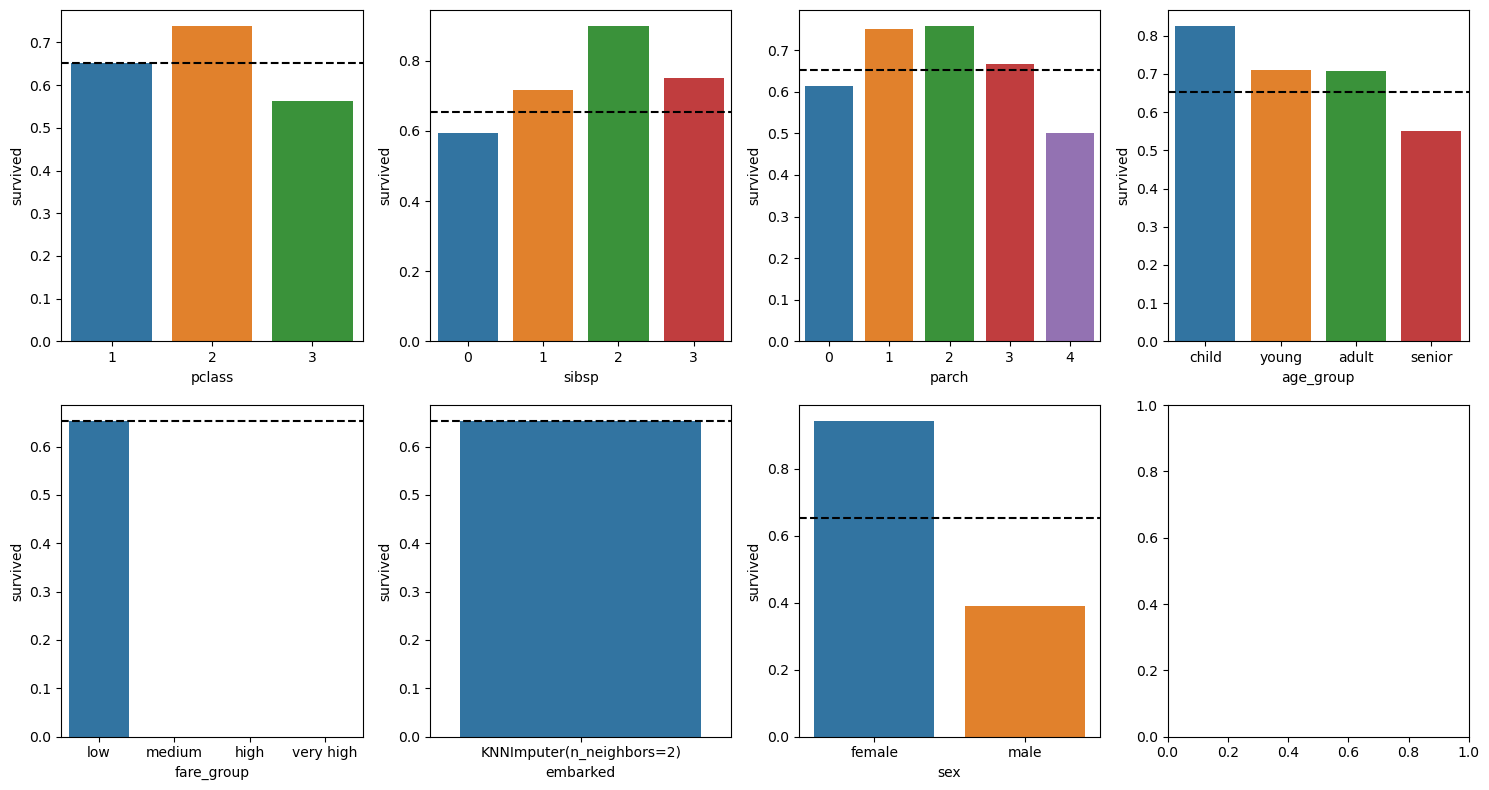

In [82]:
# 7 Subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()



In [83]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

In [84]:
female_df.survived.value_counts(normalize=True)


1    0.942857
0    0.057143
Name: survived, dtype: float64

In [85]:
female_df.groupby('pclass').survived.mean()


pclass
1    0.958333
2    0.923077
3    0.714286
Name: survived, dtype: float64

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\3474947662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=female_df, ci=None);


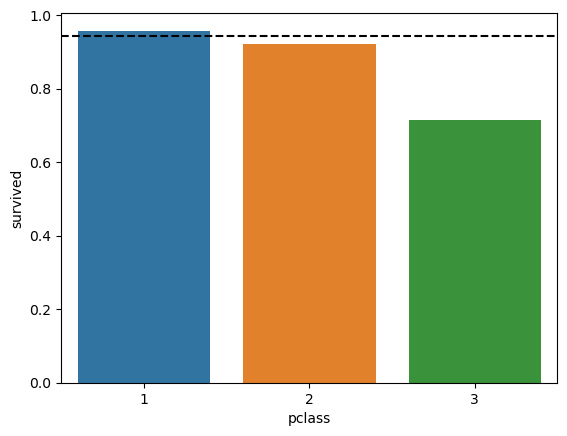

In [86]:
sns.barplot(x='pclass', y='survived', data=female_df, ci=None);
plt.axhline(female_df.survived.mean(), color='black', linestyle='--')
plt.show()

In [87]:
male_df.survived.value_counts(normalize=True)


0    0.61039
1    0.38961
Name: survived, dtype: float64

In [88]:
male_df.groupby('pclass').survived.mean()


pclass
1    0.377778
2    0.500000
3    0.444444
Name: survived, dtype: float64

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\2591017502.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=male_df, ci=None);


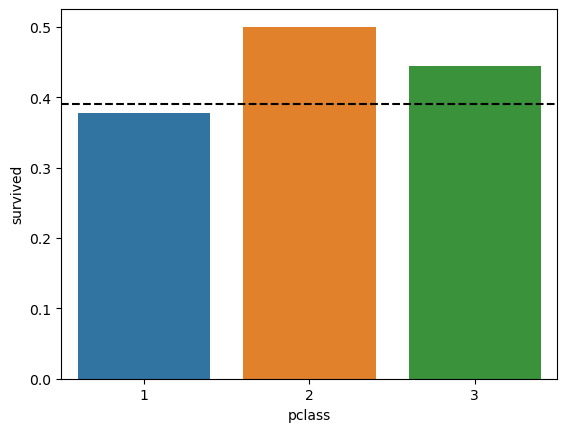

In [89]:
sns.barplot(x='pclass', y='survived', data=male_df, ci=None);
plt.axhline(male_df.survived.mean(), color='black', linestyle='--')

In [91]:
sex_class = pd.merge(female_df.groupby('pclass').survived.mean(), male_df.groupby('pclass').survived.mean(), on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.958333,0.377778
2,0.923077,0.500000
3,0.714286,0.444444


In [93]:
sex_class.rename(columns= {'survived_x': 'female_survived', 'survived_y': 'male_survived'}, inplace=True)
sex_class


,female_survived,male_survived
pclass,,
1,0.958333,0.377778
2,0.923077,0.500000
3,0.714286,0.444444


In [94]:
df.groupby(['pclass', 'sex']).survived.mean()


pclass  sex   
1       female    0.958333
        male      0.377778
2       female    0.923077
        male      0.500000
3       female    0.714286
        male      0.444444
Name: survived, dtype: float64

C:\Users\AHMED\AppData\Local\Temp\ipykernel_6224\917379349.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='survived', hue= 'sex', data=df, ci=None);


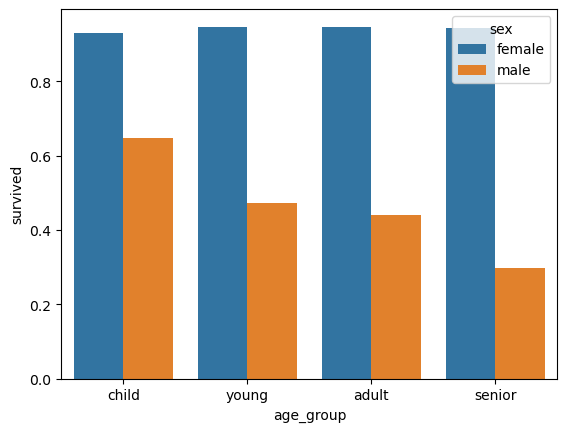

In [95]:
sns.barplot(x='age_group', y='survived', hue= 'sex', data=df, ci=None);

